<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-2">Data Import</a></span></li><li><span><a href="#Cleaning-postal_code" data-toc-modified-id="Cleaning-postal_code-3">Cleaning <code>postal_code</code></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Removing-missing-values-from-column" data-toc-modified-id="Removing-missing-values-from-column-3.0.1">Removing missing values from column</a></span></li><li><span><a href="#Removing-any-incorrectly-classified-postal-codes" data-toc-modified-id="Removing-any-incorrectly-classified-postal-codes-3.0.2">Removing any incorrectly classified postal codes</a></span></li><li><span><a href="#Converting-all-postal-codes-into-FSA-values" data-toc-modified-id="Converting-all-postal-codes-into-FSA-values-3.0.3">Converting all postal codes into FSA values</a></span></li></ul></li></ul></li><li><span><a href="#Cleaning-hours" data-toc-modified-id="Cleaning-hours-4">Cleaning <code>hours</code></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dropping-any-rows-that-have-missing-values-in-column" data-toc-modified-id="Dropping-any-rows-that-have-missing-values-in-column-4.0.1">Dropping any rows that have missing values in column</a></span></li><li><span><a href="#Flattening-dictionaries-in-column" data-toc-modified-id="Flattening-dictionaries-in-column-4.0.2">Flattening dictionaries in column</a></span></li><li><span><a href="#Adding-up-total-number-of-hours-open-a-day" data-toc-modified-id="Adding-up-total-number-of-hours-open-a-day-4.0.3">Adding up total number of hours open a day</a></span></li><li><span><a href="#Adding-back-to" data-toc-modified-id="Adding-back-to-4.0.4">Adding back to</a></span></li></ul></li></ul></li><li><span><a href="#Cleaning-attributes" data-toc-modified-id="Cleaning-attributes-5">Cleaning <code>attributes</code></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Removing-missing-values" data-toc-modified-id="Removing-missing-values-5.0.1">Removing missing values</a></span></li><li><span><a href="#Cleaning-RestaurantsPriceRange" data-toc-modified-id="Cleaning-RestaurantsPriceRange-5.0.2">Cleaning <code>RestaurantsPriceRange</code></a></span></li><li><span><a href="#Cleaning-RestaurantsTakeOut" data-toc-modified-id="Cleaning-RestaurantsTakeOut-5.0.3">Cleaning <code>RestaurantsTakeOut</code></a></span></li></ul></li></ul></li><li><span><a href="#Cleaning-Categories-Column" data-toc-modified-id="Cleaning-Categories-Column-6">Cleaning Categories Column</a></span><ul class="toc-item"><li><span><a href="#Looking-at-the-stock-classifications" data-toc-modified-id="Looking-at-the-stock-classifications-6.1">Looking at the stock classifications</a></span></li><li><span><a href="#Creating-our-own-classifications" data-toc-modified-id="Creating-our-own-classifications-6.2">Creating our own classifications</a></span></li><li><span><a href="#Converting-is_open-and-stars-into-dummy-variable" data-toc-modified-id="Converting-is_open-and-stars-into-dummy-variable-6.3">Converting <code>is_open</code> and <code>stars</code> into dummy variable</a></span></li></ul></li><li><span><a href="#Data-After-Cleaning" data-toc-modified-id="Data-After-Cleaning-7">Data After Cleaning</a></span><ul class="toc-item"><li><span><a href="#Export-File" data-toc-modified-id="Export-File-7.1">Export File</a></span></li></ul></li></ul></div>

# Introduction

The purpose of this notebook is to provide the steps I took to clean the dataset. The data came from the yelp dataset found [here](https://www.yelp.com/dataset).

In [6]:
# basic libraries used; additional libraries will be imported when needed

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
# Functions that will be used to help with data cleaning:

def show_missing(df):
    '''
    Input takes a dataframe. Prints out every column and the number of missing values + percentage of missing.
    Columns that have no missing values are not printed.
    
    '''
    
    df_columns = df.columns
    missing_data_df = pd.DataFrame(
        [column, df[column].isna().sum(), round((df[column].isna().sum()/df.shape[0]) * 100, 2)] for column in df_columns
    )
    missing_data_df.columns = ['Column', 'Missing Values', '% of N/A']
    
    
    print(missing_data_df.to_string())


# Data Import

In [8]:
# columns to be read from data source

columns_to_read = ['name', 'postal_code', 'stars_x', 'review_count', 
                   'is_open', 'attributes', 'categories', 
                   'hours']


# read file

rest_data = pd.read_csv("data/yelp_filtered.csv", usecols = columns_to_read).rename(columns= {'stars_x':'stars'})
rest_data = rest_data.drop_duplicates()
rest_data.head()

,name,postal_code,stars,review_count,is_open,attributes,categories,hours
0,Bakery Gateau,M3B 1Y6,4.5,8,1,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
10,Bolt Fresh Bar,M6J 1J5,3.0,57,1,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
70,The Steady Cafe & Bar,M6H 1M4,3.5,29,0,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Nightlife, Breakfast & Brunch, Ve...","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0..."
99,Mad Crush Wine Bar,M6G 1B3,4.0,9,0,"{'Alcohol': ""u'full_bar'"", 'Caters': 'False', ...","Restaurants, Breakfast & Brunch, Bars, Modern ...","{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',..."
108,Tavolino,M4S 2M5,4.0,18,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Italian, Restaurants",NaN


For the remainder of the data, I want to clean the data as such: 

`postal code`: 
- Make sure no missing values
- Make sure that all postal codes belong in the geographic region I want it to be in
- Convert all postal codes into FSA's (first three values)

`attributes`:
- Flatten attributes and turn into dummy variables
- Remove missing values


`categories`:
- Convert these categories into a list of defined sub-categories

`hours`:
- Flatten these and turn into number of hours open
- Fix missing hours

`stars`:
- Change these to dummy variables alongside `is_open`

`review_count`:
- Do nothing for now.
- **Thinking about using this to weigh ratings**

In [9]:
# A quick look at what kind of missing values we have

rest_data.isna().sum()

name               0
postal_code       38
stars              0
review_count       0
is_open            0
attributes       468
categories         0
hours           2530
dtype: int64

In [10]:
rest_data.shape

(10093, 8)

# Cleaning `postal_code`

In [11]:
print(f"Shape of data before cleaning postal code column: {rest_data.shape}")

Shape of data before cleaning postal code column: (10093, 8)


### Removing missing values from column

In [12]:
# Remove any rows that have any missing values in postal code column

rest_data = rest_data[rest_data['postal_code'].notna()]

### Removing any incorrectly classified postal codes

I plan on only analyzing restaurants in *M* or *V* postal codes. 

In [13]:
rest_data['postal_code'].str[:1].value_counts()

M    10044
L        8
V        2
W        1
Name: postal_code, dtype: int64

In [14]:
# Remove any postal code that is not M or V

rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:1] == 'V'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:1] == 'W'].index)

# Removing any postal code that is empty

rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:1] == ''].index)

# Removing any postal code that pertains to airports or retired postal codes

rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'L5P'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'M4I'].index)

rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'M3I'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'M5X'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'M5L'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'M5K'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'M7A'].index)
rest_data = rest_data.drop(rest_data[rest_data['postal_code'].str[:3] == 'L5T'].index)
rest_data = rest_data.reset_index()


print(f"Shape of data after cleaning postal code column: {rest_data.shape}")

Shape of data after cleaning postal code column: (9955, 9)


### Converting all postal codes into FSA values

Postal codes need to be changed to FSA values so I can merge the data with the demographic data. This is completed by only keeping the first three values of the postal code.

In [15]:
# Removing anything past the third character in postal codes

rest_data['FSA'] = rest_data['postal_code'].str[:3]


# Remove original postal_code column

rest_data.drop(columns=['postal_code'])


# Print new column

rest_data['FSA'].value_counts()

M5V    639
M5T    617
M6J    411
M6G    384
M4Y    324
      ... 
M7Y      1
L4W      1
L6A      1
M5W      1
L3R      1
Name: FSA, Length: 102, dtype: int64

# Cleaning `hours`

### Dropping any rows that have missing values in column

In [16]:
rest_data = rest_data[rest_data['hours'].notna()]
rest_data.head()

,index,name,postal_code,stars,review_count,is_open,attributes,categories,hours,FSA
0,0,Bakery Gateau,M3B 1Y6,4.5,8,1,"{'RestaurantsDelivery': 'False', 'RestaurantsP...","Bakeries, Food","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",M3B
1,10,Bolt Fresh Bar,M6J 1J5,3.0,57,1,"{'WiFi': ""u'no'"", 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",M6J
2,70,The Steady Cafe & Bar,M6H 1M4,3.5,29,0,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Nightlife, Breakfast & Brunch, Ve...","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",M6H
3,99,Mad Crush Wine Bar,M6G 1B3,4.0,9,0,"{'Alcohol': ""u'full_bar'"", 'Caters': 'False', ...","Restaurants, Breakfast & Brunch, Bars, Modern ...","{'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',...",M6G
5,127,Burrito Bandidos,M4L 1G4,3.5,43,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Tex-Mex, Mexican, Restaurants","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",M4L


### Flattening dictionaries in column

In [17]:
flattened_hours = rest_data.loc[:,'hours'].apply(lambda x: pd.Series(eval(x)))

A few assumptions here:
- It seems that NaN values actually means that it is closed. 
- Yelp seems to assume that restaurants don't close halfway through the day, which is actually quite common. 
    - This might actually work to my advantage here - this gives me a good baseline on how to split them into categorical values. I will first change the columns into how many hours they're open in a day, and then see how I should split them into dummy variables.

### Adding up total number of hours open a day

In [18]:
# Create a function that finds the number of hours a restaurant is open

def hours_open(restaurant_hours):
    '''
    Takes in the hours of operation of a restaurant. For example
    >>> 10:0 - 20:0
    10
    >>> 10:0 - 23:40
    
    Takes in a string, returns an integer.
    
    If input is NaN, returns 0
    '''
    if restaurant_hours != '0:0-0:0' and type(restaurant_hours) != float: # if not missing value or have no hours
        (start,end) = restaurant_hours.split('-')
        (start_h,start_m) = start.split(':')
        (end_h, end_m) = end.split(':')
        result = (int(end_h) - int(start_h)) + (int(end_m) - int(start_m)) / 60
        return abs(round(result, 2))
    else:
        return 0

In [19]:
# Apply to all the hours columns

flattened_hours = flattened_hours.applymap(hours_open)
flattened_hours.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
1,13.0,13.0,13.0,13.0,13.0,12.0,12.0
2,0.0,9.0,9.0,9.0,7.0,8.0,5.0
3,0.0,0.0,0.0,16.0,16.0,16.0,0.0
5,12.0,12.0,12.0,12.0,12.0,11.0,10.0


### Adding back to 

In [20]:
# Adding flatteend_hours back to data, delete original hours column
print(f"Data before adding `hours` data: {rest_data.shape}")
rest_data = pd.concat([rest_data, flattened_hours], axis = 1, sort = False)
rest_data = rest_data.drop(columns = ['hours'])
print(f"Data after adding `hours` data: {rest_data.shape}")


Data before adding `hours` data: (7483, 10)
Data after adding `hours` data: (7483, 16)


# Cleaning `attributes`

### Removing missing values

In [21]:
print(f"Shape of data after cleaning attributes column: {rest_data.shape}")

Shape of data after cleaning attributes column: (7483, 16)


In [22]:
# Removing any rows that have missing attributes 

rest_data = rest_data[rest_data['attributes'].notna()].reset_index()

The main challenge we have here is that the `attributes` column are a series of nested dictionaries. I want to flatten these dictionaries and turn them into dummy variables.

In [23]:
# Flattening the first layer of the dictionary
    
attributes_level_1 = rest_data.loc[:, 'attributes'].apply(lambda x: pd.Series(eval(x)))

In [24]:
# Dropping `BusinessParking`. There is too much missing data inside for it to be useful.

attributes_level_1 = attributes_level_1.drop(columns = ['BusinessParking']) 

In [25]:
print(f"Data before adding flattened data: {rest_data.shape}")

rest_data = pd.concat([rest_data, attributes_level_1], axis = 1, sort = False)
rest_data = rest_data.drop(columns = ['attributes'])

print(f"Data after adding flattened data: {rest_data.shape}")

Data before adding flattened data: (7202, 17)
Data after adding flattened data: (7202, 50)


In [26]:
# Looking at how many missing values there are for each column

show_missing(rest_data)

                        Column  Missing Values  % of N/A
0                      level_0               0      0.00
1                        index               0      0.00
2                         name               0      0.00
3                  postal_code               0      0.00
4                        stars               0      0.00
5                 review_count               0      0.00
6                      is_open               0      0.00
7                   categories               0      0.00
8                          FSA               0      0.00
9                       Monday               0      0.00
10                     Tuesday               0      0.00
11                   Wednesday               0      0.00
12                    Thursday               0      0.00
13                      Friday               0      0.00
14                    Saturday               0      0.00
15                      Sunday               0      0.00
16         RestaurantsDelivery 

In [27]:
# Removing any columns that have more than 25% of its data missing 

remove_these_columns = []

rest_data_columns = rest_data.columns
for column in rest_data_columns:
    if rest_data[column].isna().sum() / rest_data.shape[0] >= 0.20: # if more than 25% of data is missing
        remove_these_columns.append(column)
        
rest_data = rest_data.drop(columns = remove_these_columns)

show_missing(rest_data)

                    Column  Missing Values  % of N/A
0                  level_0               0      0.00
1                    index               0      0.00
2                     name               0      0.00
3              postal_code               0      0.00
4                    stars               0      0.00
5             review_count               0      0.00
6                  is_open               0      0.00
7               categories               0      0.00
8                      FSA               0      0.00
9                   Monday               0      0.00
10                 Tuesday               0      0.00
11               Wednesday               0      0.00
12                Thursday               0      0.00
13                  Friday               0      0.00
14                Saturday               0      0.00
15                  Sunday               0      0.00
16  RestaurantsPriceRange2             546      7.58
17      RestaurantsTakeOut             844    

To fill in the rest of the data, we will take the distribution of T/F of each column and then fill each column's missing values accordingly.

### Cleaning `RestaurantsPriceRange`

In [28]:
# Make sure values are either TRUE, FALSE, or NULL
rest_data['price_range'] = rest_data['RestaurantsPriceRange2'].fillna("1").replace('None', '1').apply(int)
rest_data = rest_data.drop(columns = ['RestaurantsPriceRange2'])

### Cleaning `RestaurantsTakeOut`

In [29]:
rest_data['take_out'] = rest_data['RestaurantsTakeOut'].replace('None', 'False').fillna("False").apply(eval).astype(int)
rest_data = rest_data.drop(columns = ['RestaurantsTakeOut'])

In [30]:
show_missing(rest_data)

          Column  Missing Values  % of N/A
0        level_0               0       0.0
1          index               0       0.0
2           name               0       0.0
3    postal_code               0       0.0
4          stars               0       0.0
5   review_count               0       0.0
6        is_open               0       0.0
7     categories               0       0.0
8            FSA               0       0.0
9         Monday               0       0.0
10       Tuesday               0       0.0
11     Wednesday               0       0.0
12      Thursday               0       0.0
13        Friday               0       0.0
14      Saturday               0       0.0
15        Sunday               0       0.0
16   price_range               0       0.0
17      take_out               0       0.0


# Cleaning Categories Column

The categories column is the most important column of the dataset, because it will provide classifications of the restaurant. 

- For example: *Freshii* should go into: *Fastfood* and *Healthy*.

## Looking at the stock classifications

In [32]:
rest_data['categories'].value_counts()

Coffee & Tea, Food                                                                                133
Food, Coffee & Tea                                                                                108
Restaurants, Italian                                                                               53
Restaurants, Chinese                                                                               48
Food, Grocery                                                                                      48
                                                                                                 ... 
Arts & Entertainment, Restaurants, Nightlife, Music Venues, Bars, Pubs, American (Traditional)      1
Nightlife, Gastropubs, Bars, British, Restaurants, Pubs                                             1
Italian, Food, Pizza, Food Delivery Services, Restaurants                                           1
Coffee & Tea, Cafes, Food, Restaurants, Desserts, Breakfast & Brunch              

In [33]:
len(rest_data['categories'].value_counts())

4734

The categories column has a lot of redundancies. The top 10 most frequent tags already show some signs of redundency; "Chinese, Restaurants" and "Restaurants, Chinese" should be the same. 

## Creating our own classifications

Lets first convert every string into a list

In [34]:
mask = rest_data['categories']

keywords_to_remove = ["&", "Restaurants", "Restaurant", "Food"]
for i in range(0,len(mask)): 
    
    # remove any commas, and seperate every word as a seperate item in a list
    mask[i] = mask[i].replace(",", "").split() 
    
    # remove any item in list that isn't a word
    for item in mask[i]:
        if item in keywords_to_remove:
            mask[i].remove(item)
    
    if 'Chinese' in mask[i] or 'Hot' in mask[i] or 'Taiwanese' in mask[i] or 'Bubble' in mask[i]:
        mask[i] = "Chinese"
    elif 'Filipino' in mask[i] or 'Thai' in mask[i] or 'Pho' in mask[i] or 'Vietnamese' in mask[i] or 'Indonesian' in mask[i]:
        mask[i] = "South East Asian"
    elif 'Iranian' in mask[i] or 'Peruvian' in mask[i] or "Persian/Iranian" in mask[i] or 'Middle' in mask[i] or 'Afghan' in mask[i] or 'Persian' in mask[i] or 'Indian' in mask[i] or 'Sri' in mask[i] or 'Halal' in mask[i] or 'Fusion' in mask[i] or 'Mediterranean' in mask[i] or 'Turkish' in mask[i] or 'Greek' in mask[i]:
        mask[i] = "West Asian"
    elif 'Coffee' in mask[i] or 'Cafes' in mask[i] or 'Tea' in mask[i]:
        mask[i] = 'Coffee/Tea'
    elif 'Bakeries' in mask[i]:
        mask[i] = "Bakeries"
    elif 'Vegan' in mask[i] or 'Vegetarian' in mask[i]:
        mask[i] = "Vegetarian/Vegan"
    elif 'Mexican' in mask[i]:
        mask[i] = "Mexican"
    elif 'Japanese' in mask[i] or 'Sushi' in mask[i] or 'Poke' in mask[i]:
        mask[i] = "Japanese"
    elif 'Caribbean' in mask[i] or 'Korean' in mask[i] or 'African' in mask[i] or 'Ethiopian' in mask[i]:
        mask[i] = "Korean"
        
        
    elif 'Italian' in mask[i] or 'Pizza' in mask[i] or 'Canadian' in mask[i] or "Poutineries" in mask[i] or \
        'Burgers' in mask[i] or 'Chips' in mask[i] or 'Fast' in mask[i] or 'Fries' in mask[i] or \
    'American' in mask[i] or 'Barbeque' in mask[i] or 'French' in mask[i] or 'Chicken' in mask[i]:
        mask[i] = "Non-Visible Minority Foods"
        
        
    elif 'Breakfast' in mask[i] or 'Brunch' in mask[i] or 'Soup' in mask[i] or 'Sandwiches' in mask[i] or 'Diners' in mask[i] or 'Waffles' in mask[i]:
        mask[i] = "Breakfast/Brunch"

    elif 'Desserts' in mask[i] or 'Ice Cream' in mask[i] or 'Frozen' in mask[i]:
        mask[i] = "Desserts"
    elif 'Bars' in mask[i] or 'Nightlife' in mask[i] or 'Beer' in mask[i] or 'Gastropubs' in mask[i] or 'Breweries' in mask[i]:
        mask[i] = "Bars"
    elif 'Specialty' in mask[i] or 'Grocery' in mask[i] or 'Stores' in mask[i] or 'Seafood' in mask[i]:
        mask[i] = "Specialty"
    else:
        mask[i] = 'Misc'

In [ ]:
# change mask to rest_data after done
rest_data['categories'].value_counts()

## Converting `is_open` and `stars` into dummy variable

[Text(0, 0.5, 'Number of Restaurants')]

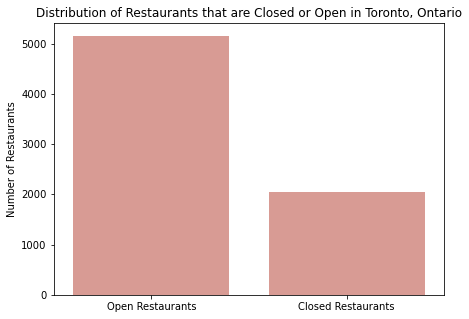

In [54]:
x1 = rest_data['is_open'].sum()
x2 = len(rest_data['is_open'])
X = [x1, x2-x1]

import seaborn as sns
plt.figure(figsize=(7,5))
ax = sns.barplot(x=['Open Restaurants', 'Closed Restaurants'], y = X, color = "salmon", saturation=.5)
ax.set_title('Distribution of Restaurants that are Closed or Open in Toronto, Ontario')
ax.set(ylabel = "Number of Restaurants")

In [67]:
x2 - x1

2051

[Text(0, 0.5, 'Number of Restaurants')]

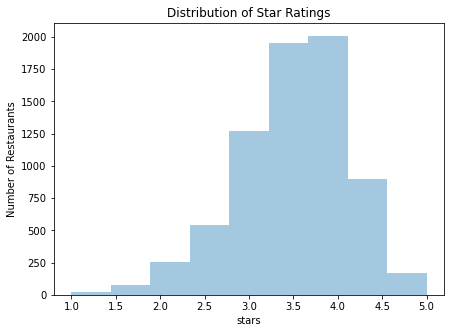

In [65]:
plt.figure(figsize=(7,5))
ax2 = sns.distplot(rest_data["stars"], kde=False, bins = 9)
ax2.set_title('Distribution of Star Ratings')
ax2.set(ylabel = "Number of Restaurants")

Any restaurant that is below 2.0 stars and/or is closed is considered a failure (`success` value of 0). Otherwise, it is considered a success.

In [115]:
rest_data['success'] = np.where(rest_data['stars'] < 3.5, 0,
                                np.where(rest_data['is_open'] == 0, 0, 1))
rest_data = rest_data.drop(columns = ['stars', 'is_open','level_0', 'index', 'postal_code'])

In [116]:
print(f"Number of unsuccessful restaurants: {(rest_data['success'] == 0).sum()}")
print(f"Number of successful restaurants: {(rest_data['success'] == 1).sum()}")

Number of unsuccessful restaurants: 3542
Number of successful restaurants: 3660


# Data After Cleaning

In [117]:
rest_data.head(10)

,name,review_count,categories,FSA,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,price_range,take_out,success
0,Bakery Gateau,8,Bakeries,M3B,11.0,11.0,11.0,11.0,11.0,11.0,11.0,2,1,1
1,Bolt Fresh Bar,57,Vegetarian/Vegan,M6J,13.0,13.0,13.0,13.0,13.0,12.0,12.0,2,1,0
2,The Steady Cafe & Bar,29,Coffee/Tea,M6H,0.0,9.0,9.0,9.0,7.0,8.0,5.0,2,0,0
3,Mad Crush Wine Bar,9,Breakfast/Brunch,M6G,0.0,0.0,0.0,16.0,16.0,16.0,0.0,3,1,0
4,Burrito Bandidos,43,Mexican,M4L,12.0,12.0,12.0,12.0,12.0,11.0,10.0,2,1,1
5,Medium Rare,22,Specialty,M9B,0.0,9.0,9.0,10.0,10.0,9.0,6.0,3,1,0
6,Paramount Fine Foods,40,West Asian,M6K,12.0,12.0,12.0,12.0,13.0,13.0,12.0,2,1,0
7,Aroma Espresso Bar,6,Coffee/Tea,M3J,16.0,16.0,16.0,16.0,16.0,11.0,11.0,1,1,1
8,Ume Fashion Sushi,25,Japanese,M1N,11.0,11.0,11.0,11.0,11.0,8.0,8.0,2,1,1
9,Not Your Mother,8,Vegetarian/Vegan,M6K,11.0,11.0,11.0,11.0,11.0,11.0,11.0,1,1,1


## Export File

In [118]:
# Export to CSV

rest_data.to_csv("cleaned_rest_data.csv")

In [68]:
rest_data.shape

(7202, 18)